In [2]:
import numpy as np # fast array library
import pandas as pd # data frames library
# plot display type. use this to keep graphs within the notebook
import matplotlib 

import matplotlib.pyplot as plt # plot library

import scipy.constants as ct # import mathematical constants
from scipy import stats # statistics, for binning and fields calculation

from matplotlib import rc
rc('text', usetex=True)
plt.rcParams['font.size'] = 14

import ipywidgets as widgets # import 

# Pandas table columns to 2D arrays (matrices)
# necessary for 2D plots
# df: input pandas dataframe;
# nx = number of bins in X axis; idem for ny
def fields_to_matrix(df, nx, ny):
    global X, Y, ux, uy, T, n, speed
    Y = np.zeros((15,15))
    X = np.zeros((15,15))
    ux = np.zeros((15,15))
    uy = np.zeros((15,15))
    T = np.zeros((15,15))
    n = np.zeros((15,15)) 
    for i in range(ny):
        for j in range(nx):
            Y[i][j] = df['Y'][nx*i + j]
            X[i][j] = df['X'][nx*i + j]
            ux[i][j] = df['ux'][nx*i + j]
            uy[i][j] = df['uy'][nx*i + j]
            n[i][j] = df['n'][nx*i + j]
            T[i][j] = df['T'][nx*i +j]
    speed = np.sqrt(ux**2 + uy**2)


In [3]:
%matplotlib inline

In [26]:
direc = '/data/Datos/blades/fields/'
file = 'fields_N45_T272.dat'

name = direc + file
datos = pd.read_csv(name,sep='\s+')

fields_to_matrix(datos,15,15)

## $T/m = 0.40$

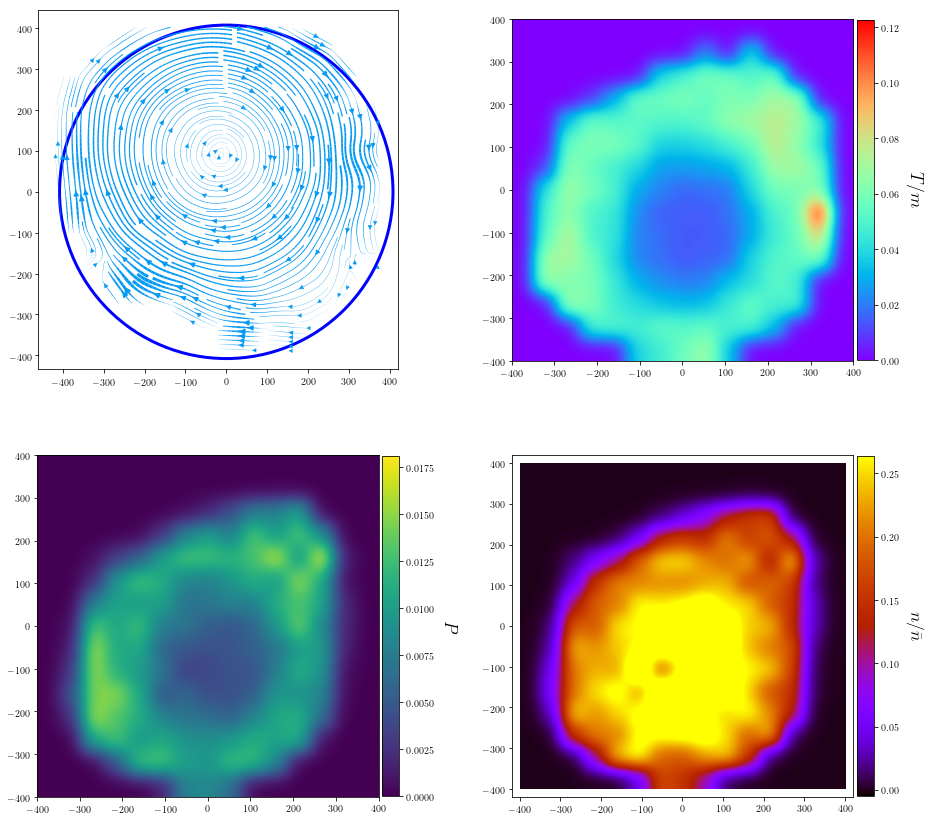

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),\
    gridspec_kw={'width_ratios': [3, 3],'height_ratios': [2.7, 3], 'wspace': 0.31, 'hspace':0.15})


#### FLOW FIELD (using streamplot) ####
draw_circle = plt.Circle((0, 0), 408, fill=False, color='b', linewidth=3)
ax1.set_aspect(1)
ax1.add_artist(draw_circle)
lw = 10 * speed
plt.xlim(-420,420)
plt.ylim(-420,420)
stream_container = ax1.streamplot(X, Y, ux, uy, color='xkcd:azure', density=2.6, linewidth=lw)

#### TEMPERATURE FIELD ##############
temp = ax2.imshow(T,cmap='rainbow', interpolation='gaussian',extent=(-400,400,-400,400))
cbar2 = plt.colorbar(temp, ax=ax2, fraction=0.047, pad=0.01)
cbar2.set_label(r'$T/m$', rotation=270, labelpad=25, fontsize=18)

####  PRESSURE FIELD ##############
press = ax3.imshow(T*n, interpolation='gaussian',extent=(-400,400,-400,400))
cbar3 = plt.colorbar(press, ax=ax3, fraction=0.047, pad=0.01)
cbar3.set_label(r'$P$', rotation=270, labelpad=25, fontsize=18)

####  DENSITY FIELD ##############
dens = ax4.imshow(n, interpolation='gaussian', cmap='gnuplot',extent=(-400,400,-400,400), 
                  vmax = np.max(n)*0.75,vmin=-0.005)
cbar4 = plt.colorbar(dens, ax=ax4,fraction=0.047, pad=0.01)
cbar4.set_label(r'$n/\bar{n}$', rotation=270, labelpad=25, fontsize=18)

## $T/m = 0.50$

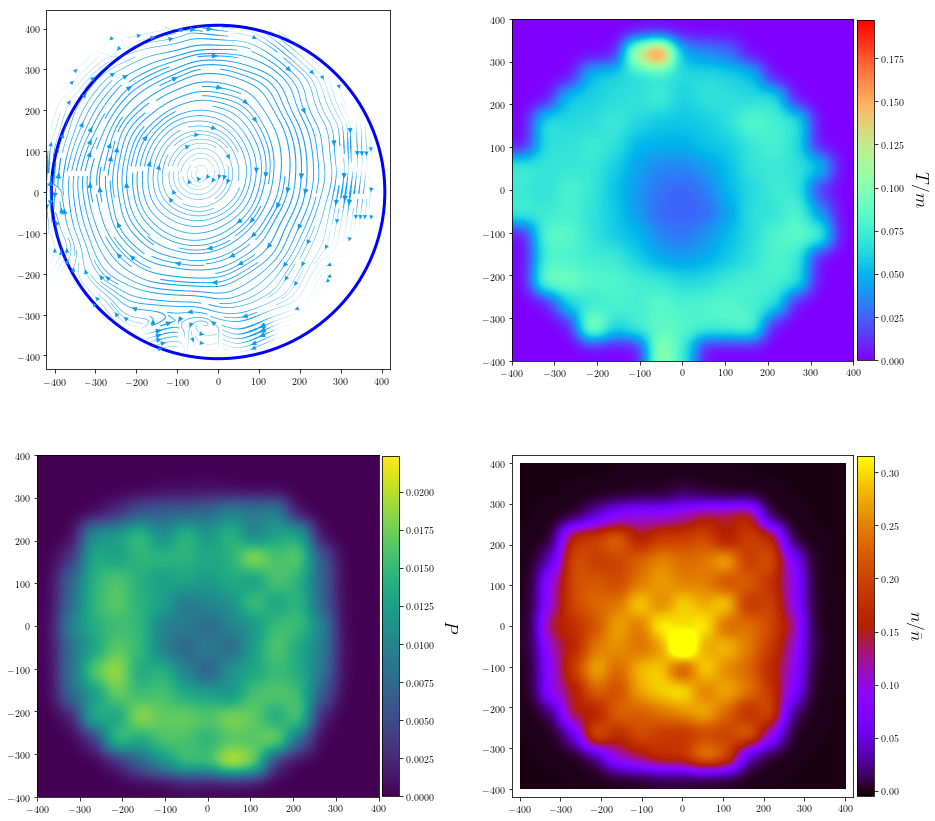

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),\
    gridspec_kw={'width_ratios': [3, 3],'height_ratios': [2.7, 3], 'wspace': 0.31, 'hspace':0.15})


#### FLOW FIELD (using streamplot) ####
draw_circle = plt.Circle((0, 0), 408, fill=False, color='b', linewidth=3)
ax1.set_aspect(1)
ax1.add_artist(draw_circle)
lw = 10 * speed
plt.xlim(-420,420)
plt.ylim(-420,420)
stream_container = ax1.streamplot(X, Y, ux, uy, color='xkcd:azure', density=2.6, linewidth=lw)

#### TEMPERATURE FIELD ##############
temp = ax2.imshow(T,cmap='rainbow', interpolation='gaussian',extent=(-400,400,-400,400))
cbar2 = plt.colorbar(temp, ax=ax2, fraction=0.047, pad=0.01)
cbar2.set_label(r'$T/m$', rotation=270, labelpad=25, fontsize=18)

####  PRESSURE FIELD ##############
press = ax3.imshow(T*n, interpolation='gaussian',extent=(-400,400,-400,400))
cbar3 = plt.colorbar(press, ax=ax3, fraction=0.047, pad=0.01)
cbar3.set_label(r'$P$', rotation=270, labelpad=25, fontsize=18)

####  DENSITY FIELD ##############
dens = ax4.imshow(n, interpolation='gaussian', cmap='gnuplot',extent=(-400,400,-400,400), 
                  vmax = np.max(n)*0.75,vmin=-0.005)
cbar4 = plt.colorbar(dens, ax=ax4,fraction=0.047, pad=0.01)
cbar4.set_label(r'$n/\bar{n}$', rotation=270, labelpad=25, fontsize=18)

# $T/m=0.57$

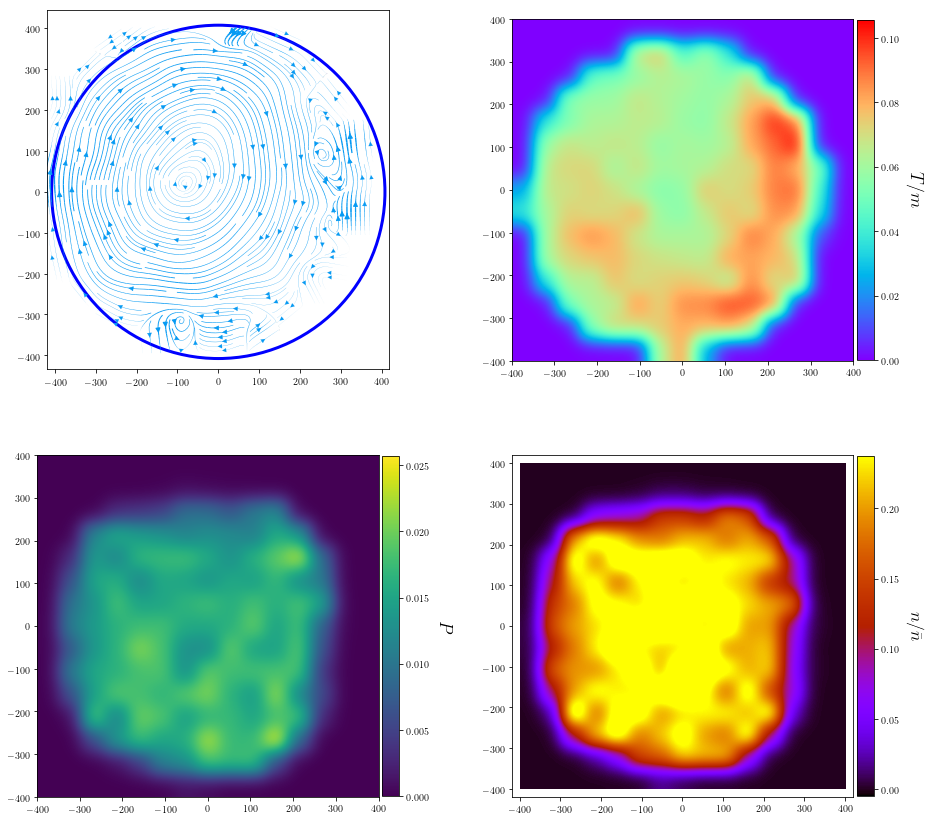

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),\
    gridspec_kw={'width_ratios': [3, 3],'height_ratios': [2.7, 3], 'wspace': 0.31, 'hspace':0.15})


#### FLOW FIELD (using streamplot) ####
draw_circle = plt.Circle((0, 0), 408, fill=False, color='b', linewidth=3)
ax1.set_aspect(1)
ax1.add_artist(draw_circle)
lw = 10 * speed
plt.xlim(-420,420)
plt.ylim(-420,420)
stream_container = ax1.streamplot(X, Y, ux, uy, color='xkcd:azure', density=2.6, linewidth=lw)

#### TEMPERATURE FIELD ##############
temp = ax2.imshow(T,cmap='rainbow', interpolation='gaussian',extent=(-400,400,-400,400))
cbar2 = plt.colorbar(temp, ax=ax2, fraction=0.047, pad=0.01)
cbar2.set_label(r'$T/m$', rotation=270, labelpad=25, fontsize=18)

####  PRESSURE FIELD ##############
press = ax3.imshow(T*n, interpolation='gaussian',extent=(-400,400,-400,400))
cbar3 = plt.colorbar(press, ax=ax3, fraction=0.047, pad=0.01)
cbar3.set_label(r'$P$', rotation=270, labelpad=25, fontsize=18)

####  DENSITY FIELD ##############
dens = ax4.imshow(n, interpolation='gaussian', cmap='gnuplot',extent=(-400,400,-400,400), 
                  vmax = np.max(n)*0.75,vmin=-0.005)
cbar4 = plt.colorbar(dens, ax=ax4,fraction=0.047, pad=0.01)
cbar4.set_label(r'$n/\bar{n}$', rotation=270, labelpad=25, fontsize=18)

## $T/m = 0.65$

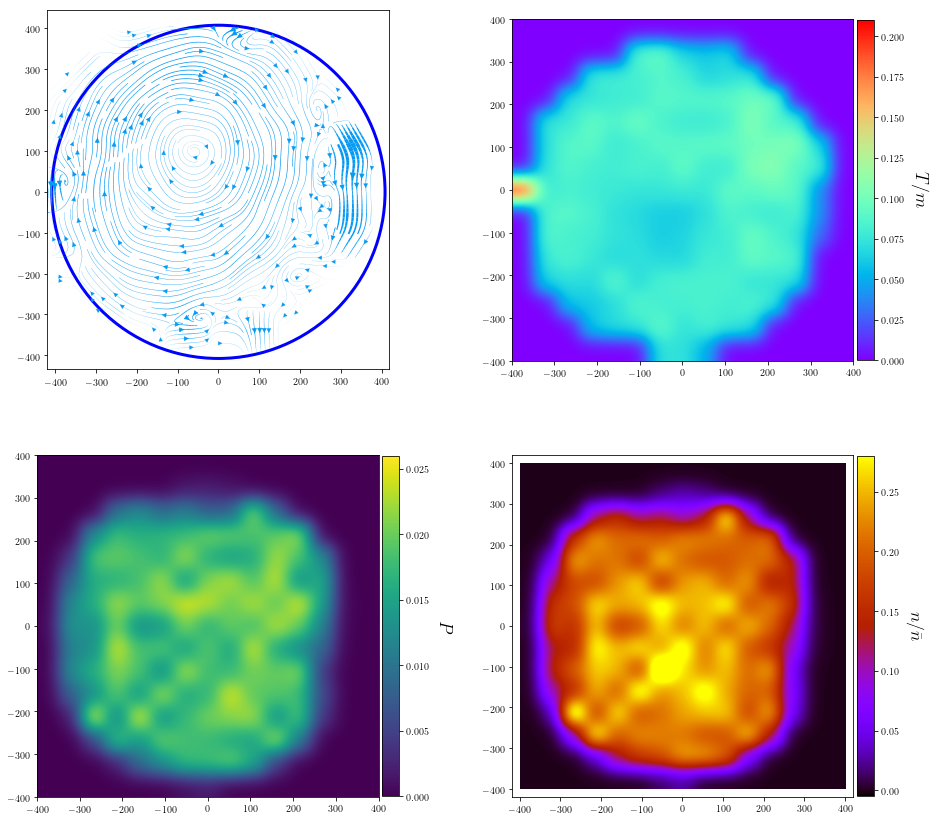

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),\
    gridspec_kw={'width_ratios': [3, 3],'height_ratios': [2.7, 3], 'wspace': 0.31, 'hspace':0.15})


#### FLOW FIELD (using streamplot) ####
draw_circle = plt.Circle((0, 0), 408, fill=False, color='b', linewidth=3)
ax1.set_aspect(1)
ax1.add_artist(draw_circle)
lw = 10 * speed
plt.xlim(-420,420)
plt.ylim(-420,420)
stream_container = ax1.streamplot(X, Y, ux, uy, color='xkcd:azure', density=2.6, linewidth=lw)

#### TEMPERATURE FIELD ##############
temp = ax2.imshow(T,cmap='rainbow', interpolation='gaussian',extent=(-400,400,-400,400))
cbar2 = plt.colorbar(temp, ax=ax2, fraction=0.047, pad=0.01)
cbar2.set_label(r'$T/m$', rotation=270, labelpad=25, fontsize=18)

####  PRESSURE FIELD ##############
press = ax3.imshow(T*n, interpolation='gaussian',extent=(-400,400,-400,400))
cbar3 = plt.colorbar(press, ax=ax3, fraction=0.047, pad=0.01)
cbar3.set_label(r'$P$', rotation=270, labelpad=25, fontsize=18)

####  DENSITY FIELD ##############
dens = ax4.imshow(n, interpolation='gaussian', cmap='gnuplot',extent=(-400,400,-400,400), 
                  vmax = np.max(n)*0.75,vmin=-0.005)
cbar4 = plt.colorbar(dens, ax=ax4,fraction=0.047, pad=0.01)
cbar4.set_label(r'$n/\bar{n}$', rotation=270, labelpad=25, fontsize=18)

## $T/m=0.90$

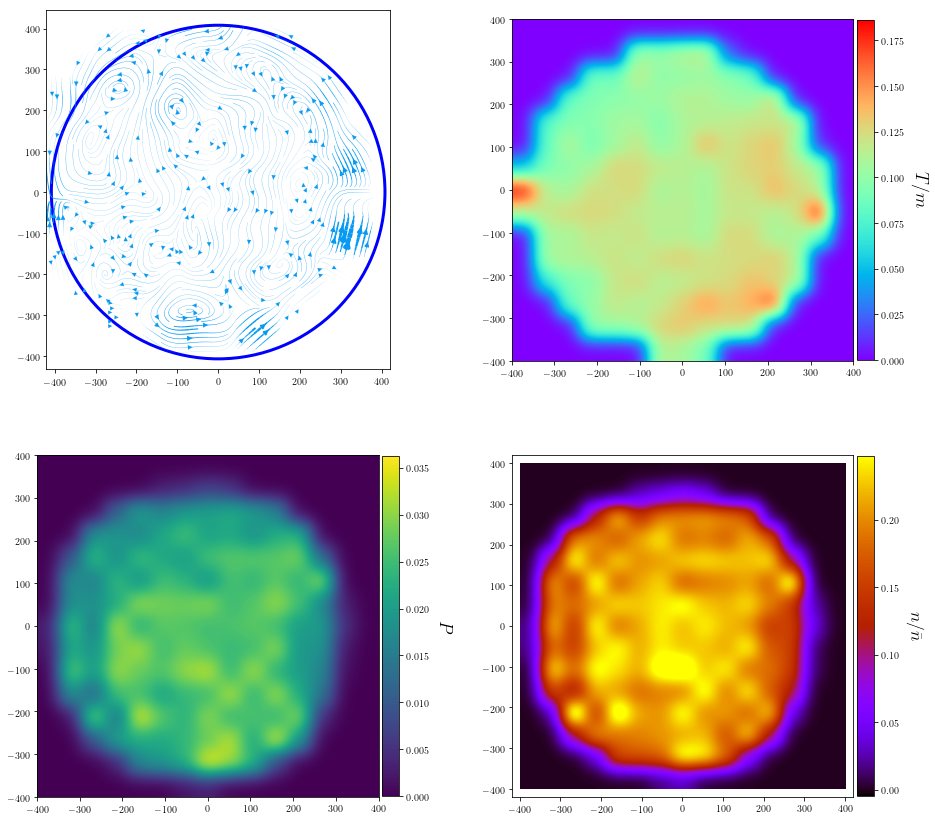

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),\
    gridspec_kw={'width_ratios': [3, 3],'height_ratios': [2.7, 3], 'wspace': 0.31, 'hspace':0.15})


#### FLOW FIELD (using streamplot) ####
draw_circle = plt.Circle((0, 0), 408, fill=False, color='b', linewidth=3)
ax1.set_aspect(1)
ax1.add_artist(draw_circle)
lw = 10 * speed
plt.xlim(-420,420)
plt.ylim(-420,420)
stream_container = ax1.streamplot(X, Y, ux, uy, color='xkcd:azure', density=2.6, linewidth=lw)

#### TEMPERATURE FIELD ##############
temp = ax2.imshow(T,cmap='rainbow', interpolation='gaussian',extent=(-400,400,-400,400))
cbar2 = plt.colorbar(temp, ax=ax2, fraction=0.047, pad=0.01)
cbar2.set_label(r'$T/m$', rotation=270, labelpad=25, fontsize=18)

####  PRESSURE FIELD ##############
press = ax3.imshow(T*n, interpolation='gaussian',extent=(-400,400,-400,400))
cbar3 = plt.colorbar(press, ax=ax3, fraction=0.047, pad=0.01)
cbar3.set_label(r'$P$', rotation=270, labelpad=25, fontsize=18)

####  DENSITY FIELD ##############
dens = ax4.imshow(n, interpolation='gaussian', cmap='gnuplot',extent=(-400,400,-400,400), 
                  vmax = np.max(n)*0.75,vmin=-0.005)
cbar4 = plt.colorbar(dens, ax=ax4,fraction=0.047, pad=0.01)
cbar4.set_label(r'$n/\bar{n}$', rotation=270, labelpad=25, fontsize=18)

## $T/m=0.96$

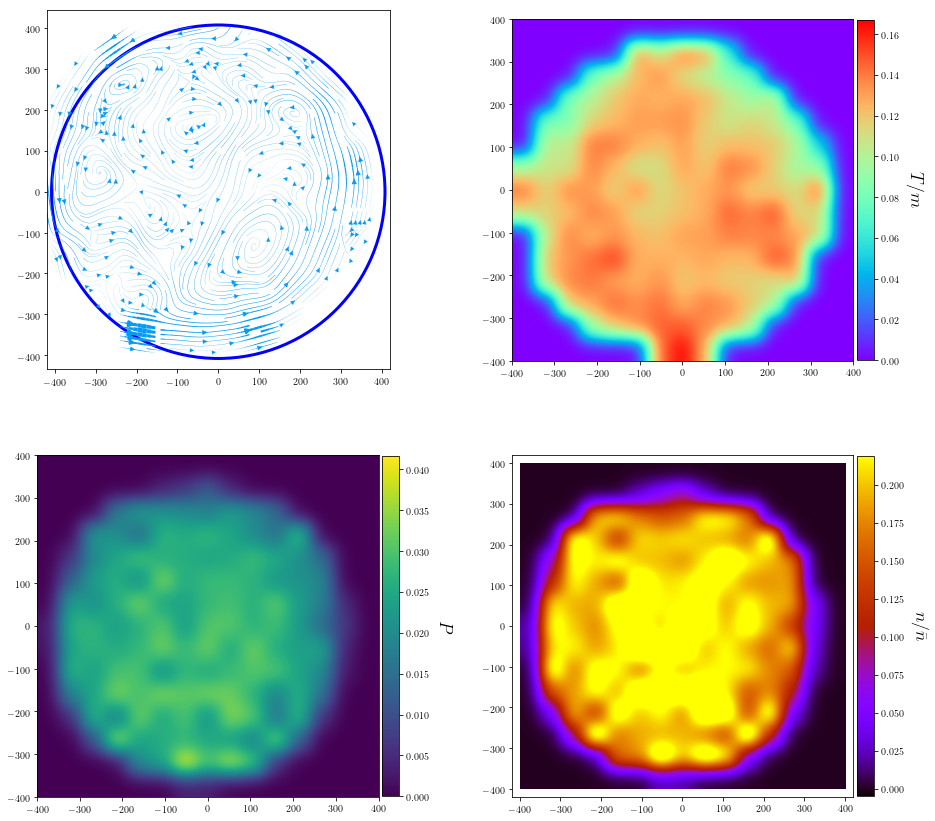

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),\
    gridspec_kw={'width_ratios': [3, 3],'height_ratios': [2.7, 3], 'wspace': 0.31, 'hspace':0.15})


#### FLOW FIELD (using streamplot) ####
draw_circle = plt.Circle((0, 0), 408, fill=False, color='b', linewidth=3)
ax1.set_aspect(1)
ax1.add_artist(draw_circle)
lw = 10 * speed
plt.xlim(-420,420)
plt.ylim(-420,420)
stream_container = ax1.streamplot(X, Y, ux, uy, color='xkcd:azure', density=2.6, linewidth=lw)

#### TEMPERATURE FIELD ##############
temp = ax2.imshow(T,cmap='rainbow', interpolation='gaussian',extent=(-400,400,-400,400))
cbar2 = plt.colorbar(temp, ax=ax2, fraction=0.047, pad=0.01)
cbar2.set_label(r'$T/m$', rotation=270, labelpad=25, fontsize=18)

####  PRESSURE FIELD ##############
press = ax3.imshow(T*n, interpolation='gaussian',extent=(-400,400,-400,400))
cbar3 = plt.colorbar(press, ax=ax3, fraction=0.047, pad=0.01)
cbar3.set_label(r'$P$', rotation=270, labelpad=25, fontsize=18)

####  DENSITY FIELD ##############
dens = ax4.imshow(n, interpolation='gaussian', cmap='gnuplot',extent=(-400,400,-400,400), 
                  vmax = np.max(n)*0.75,vmin=-0.005)
cbar4 = plt.colorbar(dens, ax=ax4,fraction=0.047, pad=0.01)
cbar4.set_label(r'$n/\bar{n}$', rotation=270, labelpad=25, fontsize=18)

## $T/m = 1.37$ 

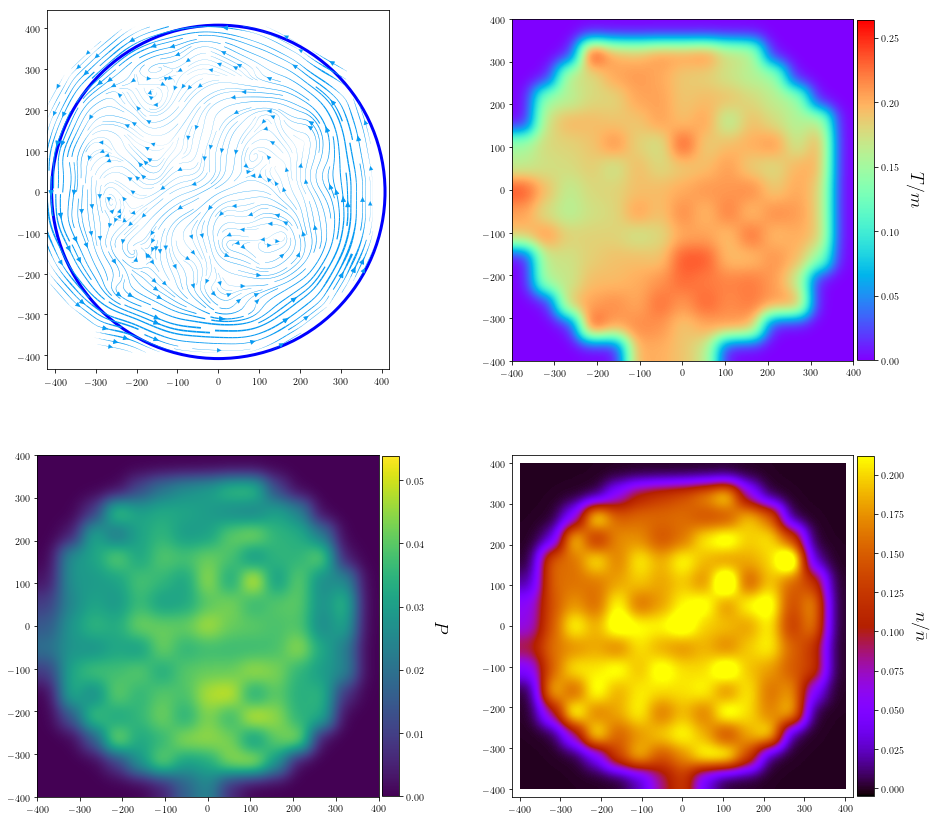

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),\
    gridspec_kw={'width_ratios': [3, 3],'height_ratios': [2.7, 3], 'wspace': 0.31, 'hspace':0.15})


#### FLOW FIELD (using streamplot) ####
draw_circle = plt.Circle((0, 0), 408, fill=False, color='b', linewidth=3)
ax1.set_aspect(1)
ax1.add_artist(draw_circle)
lw = 10 * speed
plt.xlim(-420,420)
plt.ylim(-420,420)
stream_container = ax1.streamplot(X, Y, ux, uy, color='xkcd:azure', density=2.6, linewidth=lw)

#### TEMPERATURE FIELD ##############
temp = ax2.imshow(T,cmap='rainbow', interpolation='gaussian',extent=(-400,400,-400,400))
cbar2 = plt.colorbar(temp, ax=ax2, fraction=0.047, pad=0.01)
cbar2.set_label(r'$T/m$', rotation=270, labelpad=25, fontsize=18)

####  PRESSURE FIELD ##############
press = ax3.imshow(T*n, interpolation='gaussian',extent=(-400,400,-400,400))
cbar3 = plt.colorbar(press, ax=ax3, fraction=0.047, pad=0.01)
cbar3.set_label(r'$P$', rotation=270, labelpad=25, fontsize=18)

####  DENSITY FIELD ##############
dens = ax4.imshow(n, interpolation='gaussian', cmap='gnuplot',extent=(-400,400,-400,400), 
                  vmax = np.max(n)*0.75,vmin=-0.005)
cbar4 = plt.colorbar(dens, ax=ax4,fraction=0.047, pad=0.01)
cbar4.set_label(r'$n/\bar{n}$', rotation=270, labelpad=25, fontsize=18)

## $T/m = 1.47$

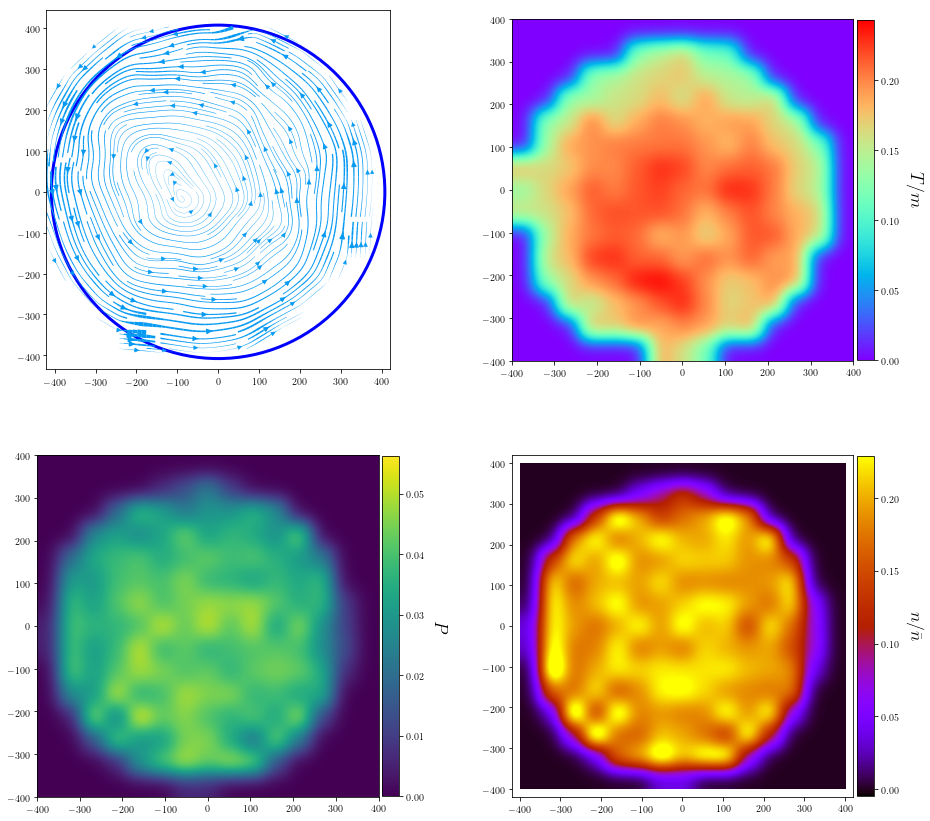

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),\
    gridspec_kw={'width_ratios': [3, 3],'height_ratios': [2.7, 3], 'wspace': 0.31, 'hspace':0.15})


#### FLOW FIELD (using streamplot) ####
draw_circle = plt.Circle((0, 0), 408, fill=False, color='b', linewidth=3)
ax1.set_aspect(1)
ax1.add_artist(draw_circle)
lw = 10 * speed
plt.xlim(-420,420)
plt.ylim(-420,420)
stream_container = ax1.streamplot(X, Y, ux, uy, color='xkcd:azure', density=2.6, linewidth=lw)

#### TEMPERATURE FIELD ##############
temp = ax2.imshow(T,cmap='rainbow', interpolation='gaussian',extent=(-400,400,-400,400))
cbar2 = plt.colorbar(temp, ax=ax2, fraction=0.047, pad=0.01)
cbar2.set_label(r'$T/m$', rotation=270, labelpad=25, fontsize=18)

####  PRESSURE FIELD ##############
press = ax3.imshow(T*n, interpolation='gaussian',extent=(-400,400,-400,400))
cbar3 = plt.colorbar(press, ax=ax3, fraction=0.047, pad=0.01)
cbar3.set_label(r'$P$', rotation=270, labelpad=25, fontsize=18)

####  DENSITY FIELD ##############
dens = ax4.imshow(n, interpolation='gaussian', cmap='gnuplot',extent=(-400,400,-400,400), 
                  vmax = np.max(n)*0.75,vmin=-0.005)
cbar4 = plt.colorbar(dens, ax=ax4,fraction=0.047, pad=0.01)
cbar4.set_label(r'$n/\bar{n}$', rotation=270, labelpad=25, fontsize=18)

## $T/m=2.20$

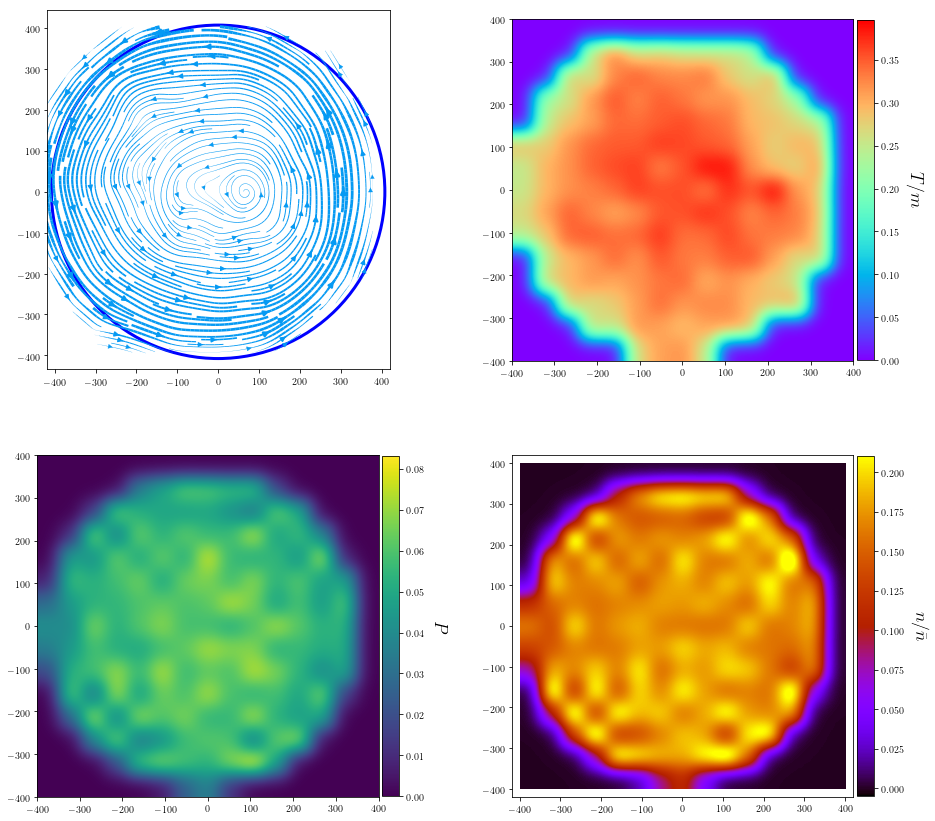

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),\
    gridspec_kw={'width_ratios': [3, 3],'height_ratios': [2.7, 3], 'wspace': 0.31, 'hspace':0.15})


#### FLOW FIELD (using streamplot) ####
draw_circle = plt.Circle((0, 0), 408, fill=False, color='b', linewidth=3)
ax1.set_aspect(1)
ax1.add_artist(draw_circle)
lw = 10 * speed
plt.xlim(-420,420)
plt.ylim(-420,420)
stream_container = ax1.streamplot(X, Y, ux, uy, color='xkcd:azure', density=2.6, linewidth=lw)

#### TEMPERATURE FIELD ##############
temp = ax2.imshow(T,cmap='rainbow', interpolation='gaussian',extent=(-400,400,-400,400))
cbar2 = plt.colorbar(temp, ax=ax2, fraction=0.047, pad=0.01)
cbar2.set_label(r'$T/m$', rotation=270, labelpad=25, fontsize=18)

####  PRESSURE FIELD ##############
press = ax3.imshow(T*n, interpolation='gaussian',extent=(-400,400,-400,400))
cbar3 = plt.colorbar(press, ax=ax3, fraction=0.047, pad=0.01)
cbar3.set_label(r'$P$', rotation=270, labelpad=25, fontsize=18)

####  DENSITY FIELD ##############
dens = ax4.imshow(n, interpolation='gaussian', cmap='gnuplot',extent=(-400,400,-400,400), 
                  vmax = np.max(n)*0.75,vmin=-0.005)
cbar4 = plt.colorbar(dens, ax=ax4,fraction=0.047, pad=0.01)
cbar4.set_label(r'$n/\bar{n}$', rotation=270, labelpad=25, fontsize=18)

## $T/m=2.72$

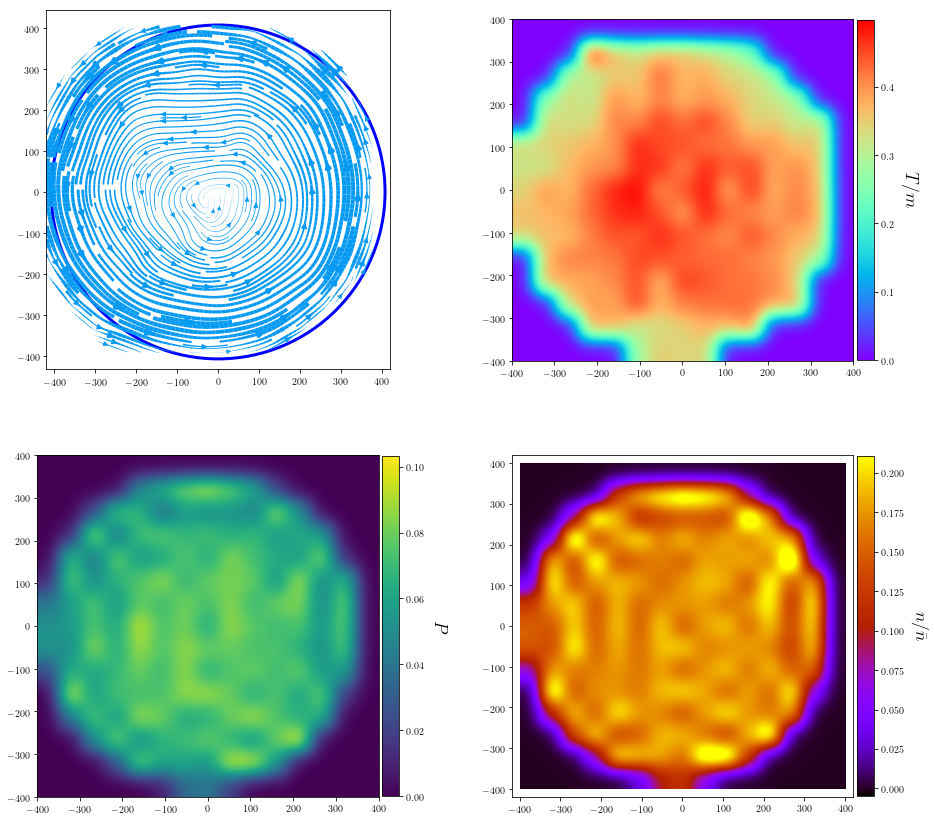

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),\
    gridspec_kw={'width_ratios': [3, 3],'height_ratios': [2.7, 3], 'wspace': 0.31, 'hspace':0.15})


#### FLOW FIELD (using streamplot) ####
draw_circle = plt.Circle((0, 0), 408, fill=False, color='b', linewidth=3)
ax1.set_aspect(1)
ax1.add_artist(draw_circle)
lw = 10 * speed
plt.xlim(-420,420)
plt.ylim(-420,420)
stream_container = ax1.streamplot(X, Y, ux, uy, color='xkcd:azure', density=2.6, linewidth=lw)

#### TEMPERATURE FIELD ##############
temp = ax2.imshow(T,cmap='rainbow', interpolation='gaussian',extent=(-400,400,-400,400))
cbar2 = plt.colorbar(temp, ax=ax2, fraction=0.047, pad=0.01)
cbar2.set_label(r'$T/m$', rotation=270, labelpad=25, fontsize=18)

####  PRESSURE FIELD ##############
press = ax3.imshow(T*n, interpolation='gaussian',extent=(-400,400,-400,400))
cbar3 = plt.colorbar(press, ax=ax3, fraction=0.047, pad=0.01)
cbar3.set_label(r'$P$', rotation=270, labelpad=25, fontsize=18)

####  DENSITY FIELD ##############
dens = ax4.imshow(n, interpolation='gaussian', cmap='gnuplot',extent=(-400,400,-400,400), 
                  vmax = np.max(n)*0.75,vmin=-0.005)
cbar4 = plt.colorbar(dens, ax=ax4,fraction=0.047, pad=0.01)
cbar4.set_label(r'$n/\bar{n}$', rotation=270, labelpad=25, fontsize=18)

In [123]:
mask = np.zeros((15,15), dtype=bool)
mask[4:15, 4:15] = True
speed[:4, :4] = np.nan
U = np.ma.array(speed, mask=mask)

In [124]:
 U

masked_array(
  data=[[nan, nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0],
        [nan, nan, nan, nan, 0.0, 0.254744728316407, 0.0, 0.0,
         0.5917068509633803, 0.21083886105744357, 0.059519955687147484,
         0.0, 0.0, 0.0, 0.0],
        [nan, nan, nan, nan, 0.27682281109041573, 0.16477142272250975,
         0.01626665607923153, 0.5059435788188245, 0.018837580311706705,
         0.06495121696319477, 0.04817437596897338, 0.024027591410709478,
         0.004486734670113668, 0.0, 0.0],
        [nan, nan, nan, nan, 0.24509770317161275, 0.165202200330383,
         0.11404425511616093, 0.006567009212723856, 0.006797489242360006,
         0.0411353983935977, 0.026532142054496846, 0.016563865279577712,
         0.04499612341080062, 0.025677131459725014, 0.0],
        [0.0, 0.0, 0.1250099923886087, 0.07373716012974733, --, --, --,
         --, --, --, --, --, --, --, --],
        [0.0, 0.0, 0.16614633958351294, 0.058028110515507915, --, --, --,
       

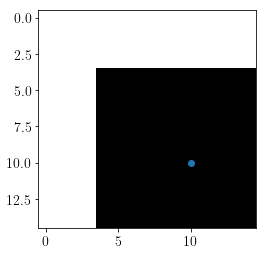

In [181]:
plt.figure()
plt.plot(10,10,'o')
plt.imshow(~mask,cmap='gray')

In [162]:
angle = np.linspace( 0 , 2 * np.pi , 150 ) 
 
radius = 0.4
 
x = radius * np.cos( angle ) 
y = radius * np.sin( angle ) 

x2 = radius * 0.9 * np.cos(angle)
y2 = radius * 0.9 * np.sin(angle)


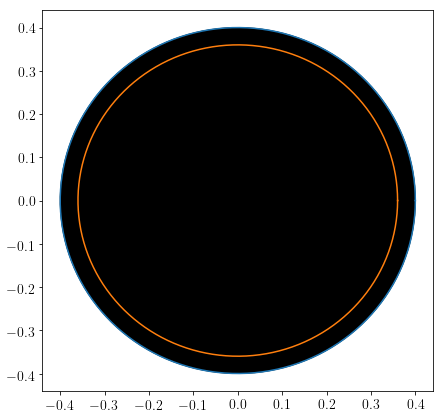

In [170]:
plt.figure(figsize=(7,7))
plt.plot(x,y)
plt.plot(x2,y2)
plt.fill(x,y,color='k')